In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/home/mks/BI/python_course/pandas/train.csv")

In [4]:
df.head()

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN


In [5]:
df.columns

Index(['pos', 'reads_all', 'matches', 'mismatches', 'deletions', 'insertions',
       'A', 'C', 'T', 'G', 'A_fraction', 'T_fraction', 'G_fraction',
       'C_fraction'],
      dtype='object')

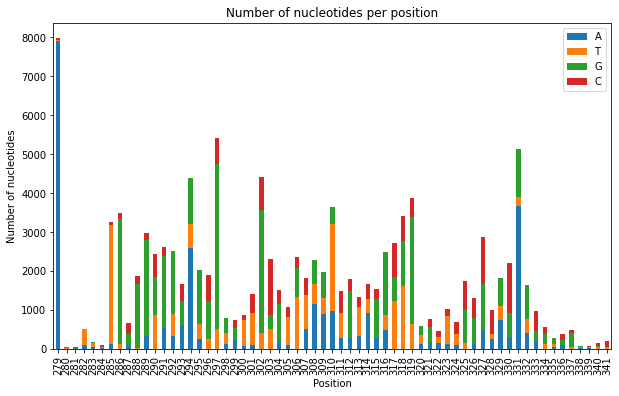

In [6]:
# 1 - Number of nucleotides by position (train.csv dataset)

# В файлике train.csv содержится информация о числе ридов с каждым из 4-ёх нуклеотидов по разным позициям (колонки A, T, G, C)). 
# Постройте гистограмму распределения этих чисел
# По x должны идти позиции (pos), а по y - частота для каждой из букв (stacked barplot)

df1 = df[['A','T','G','C']]
df1.index = df['pos'].values

ax = df1.plot.bar(stacked=True, figsize=(10, 6))
ax.set_ylabel('Number of nucleotides')
ax.set_xlabel('Position')
ax.set_title('Number of nucleotides per position')
#plt.xticks(rotation=45)
plt.show()

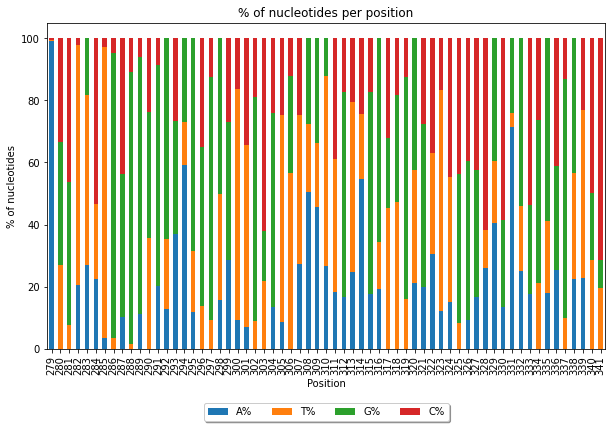

In [7]:
# 1 - % of nucleotides by position (train.csv dataset)

# В файлике train.csv содержится информация о числе ридов с каждым из 4-ёх нуклеотидов по разным позициям (колонки A, T, G, C)). 
# Постройте гистограмму распределения этих чисел
# По x должны идти позиции (pos), а по y - частота для каждой из букв (stacked barplot)

df2 = df[['A','T','G','C']]
df2 = df2.fillna(0)

df2['Sum'] = df2.sum(axis=1)
df2['A%'] = (df2['A'] / df2['Sum']) * 100
df2['T%'] = (df2['T'] / df2['Sum']) * 100
df2['G%'] = (df2['G'] / df2['Sum']) * 100
df2['C%'] = (df2['C'] / df2['Sum']) * 100
df2.index = df['pos'].values
df22 = df2[['A%','T%','G%','C%']]

ax = df22.plot.bar(stacked=True, figsize=(10, 6))
ax.set_ylabel('% of nucleotides')
ax.set_xlabel('Position')
ax.set_title('% of nucleotides per position')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=4)
#plt.xticks(rotation=45)
plt.show()

In [8]:
# 2 - train.csv dataset subsetting 

# Сохраните в файл train_part.csv следующую часть из файла train.csv:
# строки, где matches больше чем среднее
# колонки pos, reads_all, mismatches, deletions, insertions

df['matches'].mean()

df3 = df[df['matches'] > df['matches'].mean()]
df3 = df3[['pos', 'reads_all', 'mismatches', 'deletions', 'insertions']]
df3
df3.to_csv('/home/mks/BI/python_course/pandas/train_part.csv')


In [9]:
df3.head()

,pos,reads_all,mismatches,deletions,insertions
1,280,8045,48,19,9
2,281,8045,50,16,5
3,282,8049,505,33,65
4,283,8042,155,115,62
5,284,8048,104,864,241


In [10]:
# 3 - EDA of the kaggle dataset 'imdb_top_1000.csv' (https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows)

# Проведите Explorative Data Analysis знаменитого датасэта титаника (или какого-нибудь другого, если вам скушно с Титаником). 
# Как минимум нужны корреляции, графики распределений 

# Import the dataframe nad

kdf = pd.read_csv("/home/mks/BI/python_course/pandas/imdb_top_1000.csv") 
kdf.head(3) # first look at the dataframe

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [12]:
# Get main dataframe indormation

kdf.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [13]:
# Turn Release year information into numeric
# from 'pandas.to_numeric' docomentation - If errors = ‘coerce’, then invalid parsing will be set as NaN
kdf['Released_Year']=pd.to_numeric(kdf['Released_Year'], errors = 'coerce')

In [14]:
# Remove 'min' word from Runtime values and turn it into numeric
kdf['Runtime']=kdf['Runtime'].apply(lambda a: a[0:-3]) # removing the last three letters
kdf['Runtime']=pd.to_numeric(kdf['Runtime'], errors = 'coerce')

In [15]:
# Transform grosses values to numeric
kdf['Gross']=kdf['Gross'].apply(lambda a: a.replace(',','') if isinstance(a, str) else a)
kdf['Gross']=pd.to_numeric(kdf['Gross'], errors='coerce')

In [16]:
# Count missing values by column
kdf.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [17]:
######### Dataframe variables exploration

# Number of directors in the list

kdf['Director'].nunique()

548

In [18]:
# Top 15 Directors

kdf['Director'].value_counts().head(15)

Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Martin Scorsese      10
Akira Kurosawa       10
Woody Allen           9
Stanley Kubrick       9
Billy Wilder          9
David Fincher         8
Christopher Nolan     8
Quentin Tarantino     8
Clint Eastwood        8
Howard Hawks          7
Ingmar Bergman        7
Rob Reiner            7
Name: Director, dtype: int64

In [19]:
# Number of genres in the list

kdf['Genre'].nunique()

202

In [20]:
# Top 15 genres

kdf['Genre'].value_counts().head(15)

Drama                           85
Drama, Romance                  37
Comedy, Drama                   35
Comedy, Drama, Romance          31
Action, Crime, Drama            30
Crime, Drama, Thriller          28
Biography, Drama, History       28
Crime, Drama, Mystery           27
Crime, Drama                    26
Animation, Adventure, Comedy    24
Action, Adventure, Sci-Fi       21
Biography, Crime, Drama         16
Drama, War                      15
Comedy, Crime, Drama            15
Action, Adventure, Drama        14
Name: Genre, dtype: int64

In [36]:
# Top 15 1st stars

kdf['Star1'].value_counts().head(15)

Tom Hanks            12
Robert De Niro       11
Al Pacino            10
Clint Eastwood       10
Leonardo DiCaprio     9
Humphrey Bogart       9
Johnny Depp           8
James Stewart         8
Christian Bale        8
Denzel Washington     7
Toshirô Mifune        7
Aamir Khan            7
Jake Gyllenhaal       6
Cary Grant            6
Tom Cruise            6
Name: Star1, dtype: int64

In [37]:
# Top 15 2nd stars - Do they cross the list of top main stars somehow?

kdf['Star2'].value_counts().head(15)

Emma Watson          7
Matt Damon           5
Chris Evans          4
Ian McKellen         4
Julie Delpy          4
Brad Pitt            4
Ed Harris            4
Meryl Streep         4
Diane Keaton         4
Kate Winslet         4
Alec Guinness        3
Patricia Arquette    3
Robert Redford       3
Samantha Morton      3
Katharine Hepburn    3
Name: Star2, dtype: int64

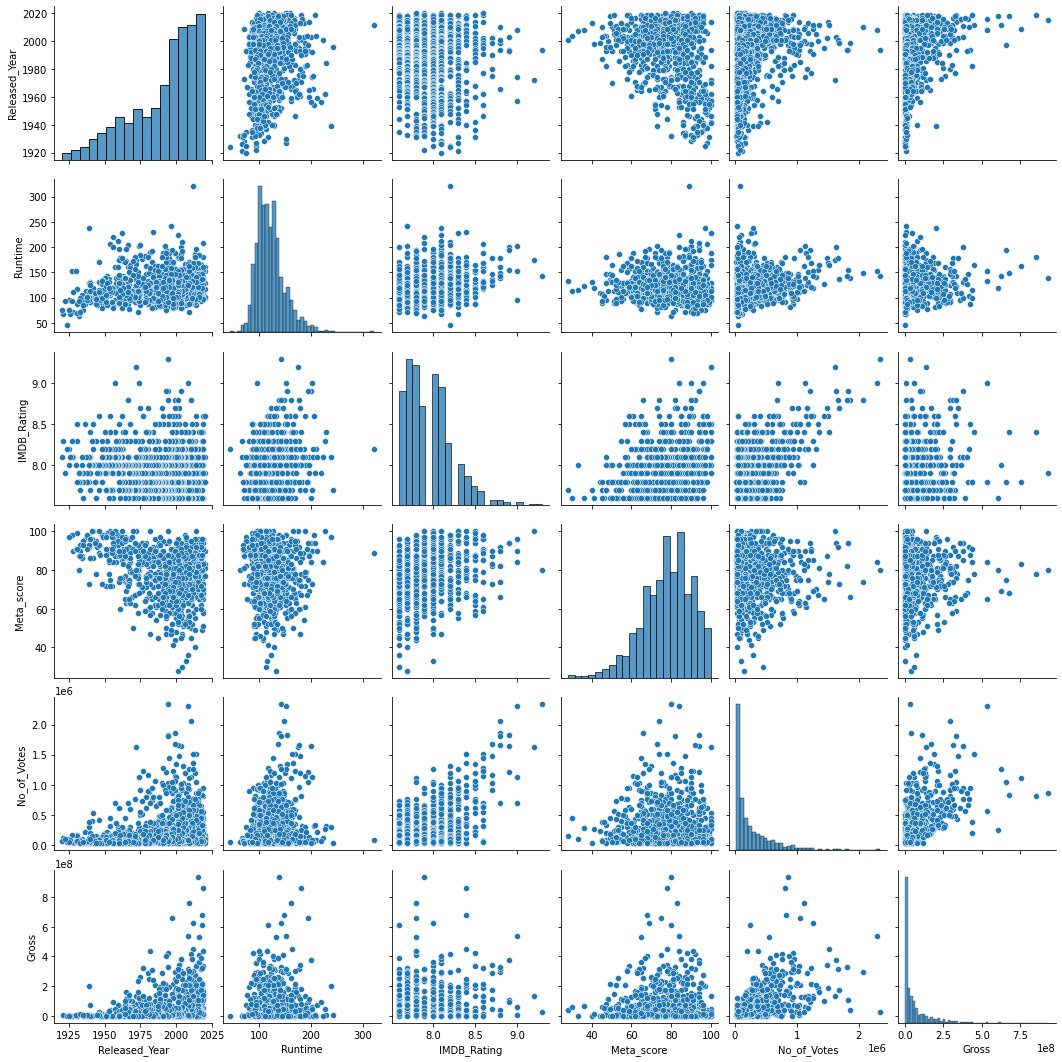

In [21]:
# Fast pair-wise variables interconnections exploration summary

sns.pairplot(kdf)

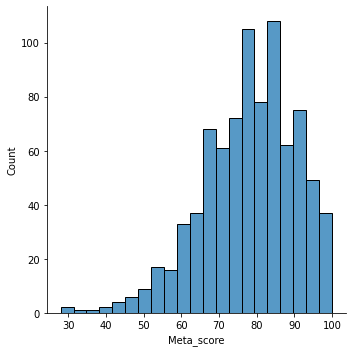

In [22]:
# Looking at some interesting fundings in the details

# How Meta scores are distibuted? 

sns.displot(kdf['Meta_score'][pd.notnull(kdf['Meta_score'])])

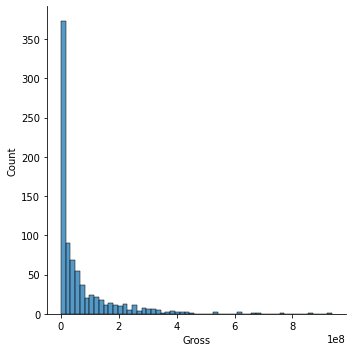

In [23]:
# How Grosses are distributed? Is there some oustanding films?

sns.displot(kdf['Gross'][pd.notnull(kdf['Gross'])])

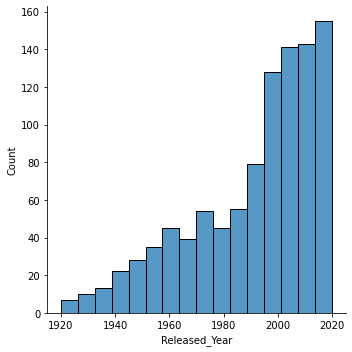

In [24]:
# What times ranges yielded more successful films?

sns.displot(kdf['Released_Year'][pd.notnull(kdf['Released_Year'])])

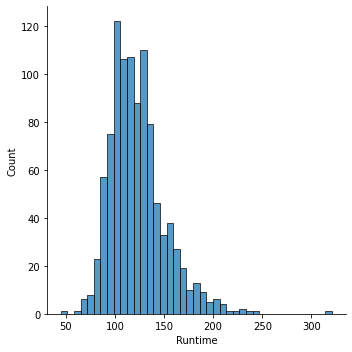

In [25]:
# What is Runtime distribution across the Top films? 

sns.displot(kdf['Runtime'][pd.notnull(kdf['Runtime'])])

<AxesSubplot:>

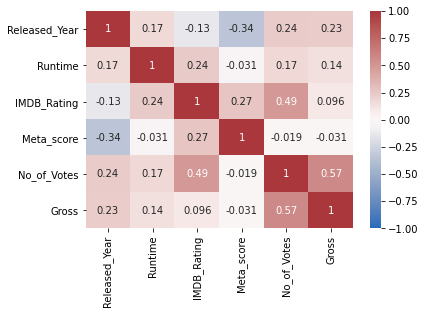

In [28]:
# Is there any correlative numeric features in the data?

sns.heatmap(kdf.corr(),annot=True, cmap="vlag", vmin=-1)

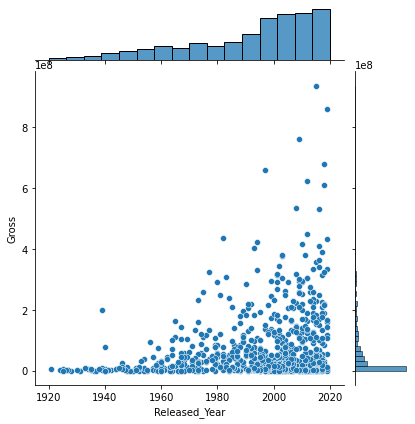

In [31]:
# As one could see above, some variables in the dataset are far from being normally distributed (e.g. Gross)
# thus disabling simple correletion plot to identify interesting interconnections

# Looking at some of them manually

# Gross vs Released Year

sns.jointplot(x='Released_Year', y='Gross', data=kdf)

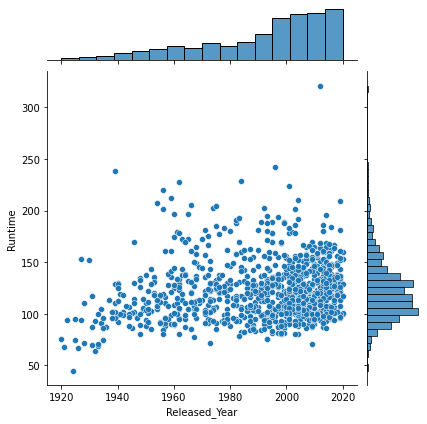

In [32]:
# Runtime vs Released year

sns.jointplot(x='Released_Year', y='Runtime', data=kdf)

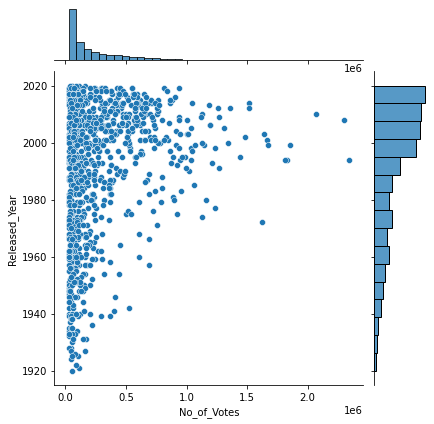

In [35]:
# "Peaples are peaples" - nobody looks old-fasioned films =)

sns.jointplot(x='No_of_Votes', y='Released_Year', data=kdf)